# Import necessary packages

In [ ]:
import numpy as np
from scipy.stats import ttest_ind
from tqdm import tqdm
import matplotlib.pyplot as plt
from satisfaction_score_data_generator import generate_dataset_with_sensor_readings_and_satisfaction_scores

## Power calculation

In [2]:
sample_size = 5
noise_standard_deviation = 0.08
wavelet = 'db8'

satisfaction_vs_sensors, satisfaction_vs_sensors_null = generate_dataset_with_sensor_readings_and_satisfaction_scores(sample_size, noise_standard_deviation, wavelet)

measurement_name = 'air'
sensor_name = f'sensor_{measurement_name}'
score_name = f'comfort_score_{measurement_name}'

score_values = satisfaction_vs_sensors[[score_name]]
score_values_null = satisfaction_vs_sensors_null[[score_name]]

t_statistics, p_value_t = ttest_ind(score_values, score_values_null)

print(p_value_t)

[0.82574806]


In [3]:
alpha = 0.05
sample_size = 10
noise_standard_deviation = 0.08
measurement_name = 'air'

def test_hypothesis(sample_size, alpha, noise_standard_deviation, measurement_name):

    satisfaction_vs_sensors, satisfaction_vs_sensors_null = generate_dataset_with_sensor_readings_and_satisfaction_scores(sample_size,                                                                                     noise_standard_deviation, 'db8')

    score_name = f'comfort_score_{measurement_name}'

    score_values = satisfaction_vs_sensors[[score_name]]
    score_values_null = satisfaction_vs_sensors_null[[score_name]]

    t_statistics, p_value_t = ttest_ind(score_values, score_values_null)

    result = p_value_t < alpha
    
    return result

result = test_hypothesis(sample_size, alpha, noise_standard_deviation, measurement_name)
print(result)

[False]


In [6]:
sample_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 250]
number_of_experiments = 1000

def power_simulation_testing(number_of_experiments, sample_size, alpha, noise_standard_deviation, measurement_name):
    rejections = np.zeros(number_of_experiments, dtype=bool)
    test_power = []
    for size in tqdm(sample_size):
        for experiment in range(number_of_experiments):
            rejections[experiment] = test_hypothesis(size, alpha, noise_standard_deviation, measurement_name)
            
        test_power.append(np.mean(rejections))
        
        
    return test_power

In [7]:
test_power = power_simulation_testing(number_of_experiments, sample_size, alpha, noise_standard_deviation, measurement_name)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [06:10<00:00, 25.05s/it]


Text(0, 0.5, 'Test power')

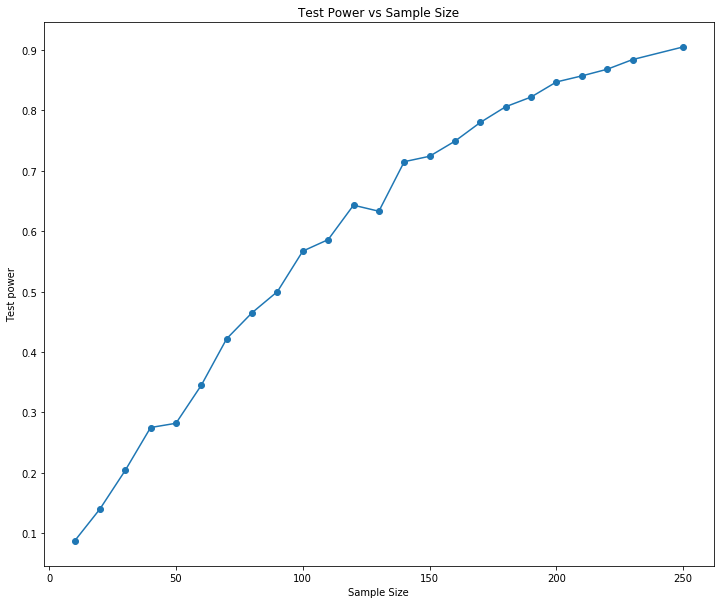

In [8]:
plt.figure(figsize=(12, 10))

# Plot test power
plt.plot(sample_size, test_power, 'o-')
plt.title('Test Power vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Test power')